In [1]:
from PIL import Image, ImageDraw
import cv2 as cv #Importamos la librería de OpenCV
import matplotlib.pyplot as plt #Importamos el módulo matplotlib para mostrar gráficos matemáticos e imágenes (como gráficos). 
import numpy as np
import os
import random
import tensorflow as tf
import pathlib
class_names = ['circulos', 'hexagonos', 'pentagonos', 'rectangulos', 'triangulos']
data_dir = "./Images/Train/"
test_dir = "./Images/Test/"
dalle_dir = "./Images/DALL-E/"
real_dir = "./Images/TestsReales/"
%set_env KMP_DUPLICATE_LIB_OK=TRUE

env: KMP_DUPLICATE_LIB_OK=TRUE


In [920]:
'''
CLASES:
Triangulo
Rectangulo
Pentagono (regular)
Hexágono (regular)
Circulo
'''

'\nCLASES:\nTriangulo\nRectangulo\nPentagono (regular)\nHexágono (regular)\nCirculo\n'

In [69]:
#GENERAL
imageSize = (64, 64)

#RECTANGULOS

minOriginR = 0
maxOriginR = 44
minHeightWidthR = 6
maxHeightWidthR = 20

#RESTOPOLIGONOS
minOriginP = 13
maxOriginP = 51
minRadio = 13
maxRadio = 19
minRotation = 0
maxRotation = 360

In [68]:
def generaTriangulos(out_folder, starting_number, n_shapes):
    for i in range(starting_number, starting_number+n_shapes):
        x = random.randrange(minOriginP, maxOriginP)
        y = random.randrange(minOriginP, maxOriginP)
        radius = random.randrange(minRadio, maxRadio)
        rotate = random.randrange(minRotation, maxRotation)
        image = Image.new('RGB', imageSize, 'white')  # could also open an existing image here to draw shapes over it
        draw = ImageDraw.Draw(image)
        draw.regular_polygon((x, y, radius), 3, rotation=rotate, fill='black', outline='black')  # can vary this bit to draw different shapes in different positions
        image.save(out_folder+str(i)+'.png')

def generaRectangulos(out_folder, starting_number, n_shapes):
    for i in range(starting_number, starting_number+n_shapes):
        x = random.randrange(minOriginR, maxOriginR)
        y = random.randrange(minOriginR, maxOriginR)
        u = x + random.randrange(minHeightWidthR, maxHeightWidthR)
        v = y + random.randrange(minHeightWidthR, maxHeightWidthR)
        image = Image.new('RGB', imageSize, 'white')  # could also open an existing image here to draw shapes over it
        draw = ImageDraw.Draw(image)
        draw.rectangle((x,y,u,v), fill='black', outline='black')  # can vary this bit to draw different shapes in different positions
        image.save(out_folder+str(i)+'.png')

def generaPentagonos(out_folder, starting_number, n_shapes):
    for i in range(starting_number, starting_number+n_shapes):
        x = random.randrange(minOriginP, maxOriginP)
        y = random.randrange(minOriginP, maxOriginP)
        radius = random.randrange(minRadio, maxRadio)
        rotate = random.randrange(minRotation, maxRotation)
        image = Image.new('RGB', imageSize, 'white')  # could also open an existing image here to draw shapes over it
        draw = ImageDraw.Draw(image)
        draw.regular_polygon((x, y, radius), 5, rotation=rotate, fill='black', outline='black')  # can vary this bit to draw different shapes in different positions
        image.save(out_folder+str(i)+'.png')

def generaHexagonos(out_folder, starting_number, n_shapes):
    for i in range(starting_number, starting_number+n_shapes):
        x = random.randrange(minOriginP, maxOriginP)
        y = random.randrange(minOriginP, maxOriginP)
        radius = random.randrange(minRadio, maxRadio)
        rotate = random.randrange(minRotation, maxRotation)
        image = Image.new('RGB', imageSize, 'white')  # could also open an existing image here to draw shapes over it
        draw = ImageDraw.Draw(image)
        draw.regular_polygon((x, y, radius), 6, rotation=rotate, fill='black', outline='black')  # can vary this bit to draw different shapes in different positions
        image.save(out_folder+str(i)+'.png')

def generaCirculos(out_folder, starting_number, n_shapes):
    for i in range(starting_number, starting_number+ n_shapes):
        x = random.randrange(minOriginP, maxOriginP)
        y = random.randrange(minOriginP, maxOriginP)
        u = x + random.randrange(minHeightWidthR, maxHeightWidthR)
        v = y + random.randrange(minHeightWidthR, maxHeightWidthR)
        image = Image.new('RGB', imageSize, 'white')  # could also open an existing image here to draw shapes over it
        draw = ImageDraw.Draw(image)
        draw.ellipse((x, y, u,v), fill='black', outline='black')  # can vary this bit to draw different shapes in different positions
        image.save(out_folder+str(i)+'.png')

def genData(imagePath, imagesPerClass):
    imagePath = str(imagePath)
    for s in ['/triangulos', '/rectangulos', '/pentagonos', '/hexagonos', '/circulos']:
        if not os.path.exists(imagePath + s):
            os.makedirs(imagePath+s)
    generaTriangulos(imagePath + '/triangulos/', 0, imagesPerClass)
    generaRectangulos(imagePath + '/rectangulos/', 0, imagesPerClass)
    generaCirculos(imagePath + '/circulos/', 0, imagesPerClass)
    generaPentagonos(imagePath + '/pentagonos/', 0, imagesPerClass)
    generaHexagonos(imagePath + '/hexagonos/', 0, imagesPerClass)

In [70]:
genData(data_dir, 1000)
genData(test_dir, 100)

In [29]:
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

5000


Para comenzar, la red toma como entrada los pixeles de una imagen. Si tenemos una imagen con nxm pixeles de alto y ancho equivalen a n * m neuronas. Por lo que en nuestro ejemplo serán 64 * 64 = 4096 neuronas. Si las imágenes fueran a color (RGB) en su lugar utiliriamos 64 * 64 * 3 ... 

Estas neuronas constituyen nuestra capa de entrada.

### Preprocesamiento

https://www.tensorflow.org/tutorials/load_data/images




In [30]:
batch_size = 32
img_height = 64
img_width = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5000 files belonging to 5 classes.
Using 4000 files for training.
Found 5000 files belonging to 5 classes.
Using 1000 files for validation.


In [31]:
class_names = train_ds.class_names
print(class_names)

['circulos', 'hexagonos', 'pentagonos', 'rectangulos', 'triangulos']


In [32]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 64, 64, 1)
(32,)


image_batch es un tensor de la forma (32, 180, 180, 3) . Este es un lote de 32 imágenes de forma 180x180x3 (la última dimensión se refiere a los canales de color RGB). El label_batch es un tensor de la forma (32,) , estas son las etiquetas correspondientes a las 32 imágenes.

Puede llamar a .numpy() en cualquiera de estos tensores para convertirlos en numpy.ndarray 

#### Estandarizar los datos
Los valores del canal RGB están en el rango [0, 255] . Esto no es ideal para una red neuronal; en general, debe buscar que sus valores de entrada sean pequeños.

Aquí, estandarizará los valores para que estén en el rango [0, 1] usando tf.keras.layers.Rescaling :

### Configurar el conjunto de datos para el rendimiento
Asegurémonos de utilizar la captación previa almacenada en búfer para que pueda obtener datos del disco sin que la E/S se convierta en un bloqueo. Estos son dos métodos importantes que debe usar al cargar datos:

- Dataset.cache mantiene las imágenes en la memoria después de que se cargan fuera del disco durante la primera época. Esto asegurará que el conjunto de datos no se convierta en un cuello de botella mientras entrena su modelo. Si su conjunto de datos es demasiado grande para caber en la memoria, también puede usar este método para crear un caché en disco de alto rendimiento.
- Dataset.prefetch superpone el preprocesamiento de datos y la ejecución del modelo durante el entrenamiento.


In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### entrenar a un modelo
Para completar, mostrará cómo entrenar un modelo simple utilizando los conjuntos de datos que acaba de preparar.

El modelo secuencial consta de tres bloques de convolución ( tf.keras.layers.Conv2D ) con una capa de agrupación máxima ( tf.keras.layers.MaxPooling2D ) en cada uno de ellos. Hay una capa totalmente conectada ( tf.keras.layers.Dense ) con 128 unidades encima que se activa mediante una función de activación de ReLU ( 'relu' ). Este modelo no se ha ajustado de ninguna manera: el objetivo es mostrarle la mecánica utilizando los conjuntos de datos que acaba de crear. 

In [34]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(64, 64, 1)),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation = "softmax")
])

Elija el optimizador tf.keras.optimizers.Adam y la función de pérdida tf.keras.losses.SparseCategoricalCrossentropy . Para ver la precisión del entrenamiento y la validación para cada época de entrenamiento, pase el argumento de metrics a Model.compile .

In [35]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.sparse_categorical_crossentropy,
  metrics=['accuracy'])

In [36]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

In [37]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,
  callbacks = es_callback
)

Epoch 1/30
125/125 [==============================] - 6s 41ms/step - loss: 1.0109 - accuracy: 0.5140 - val_loss: 0.7414 - val_accuracy: 0.6150
Epoch 2/30
125/125 [==============================] - 4s 35ms/step - loss: 0.6317 - accuracy: 0.6955 - val_loss: 0.6524 - val_accuracy: 0.6780
Epoch 3/30
125/125 [==============================] - 4s 31ms/step - loss: 0.4687 - accuracy: 0.7655 - val_loss: 0.4472 - val_accuracy: 0.7440
Epoch 4/30
125/125 [==============================] - 4s 30ms/step - loss: 0.4178 - accuracy: 0.7895 - val_loss: 0.4492 - val_accuracy: 0.7360
Epoch 5/30
125/125 [==============================] - 4s 30ms/step - loss: 0.3393 - accuracy: 0.8242 - val_loss: 0.3719 - val_accuracy: 0.7850
Epoch 6/30
125/125 [==============================] - 4s 31ms/step - loss: 0.3163 - accuracy: 0.8367 - val_loss: 0.3264 - val_accuracy: 0.8030
Epoch 7/30
125/125 [==============================] - 4s 31ms/step - loss: 0.2899 - accuracy: 0.8450 - val_loss: 0.3617 - val_accuracy: 0.8070

In [42]:
model.save('red_entrenada1.h5')

<h1> TESTS </h1>

<h2>Parte 1 - Tests sobre imágenes generadas de la misma forma que las del train set</h2>

In [2]:
model = tf.keras.models.load_model('red_entrenada.h5')

In [3]:
triangleImages = np.array([cv.imread(test_dir + 'triangulos/' + str(i) + '.png', cv.IMREAD_GRAYSCALE) for i in range(100)])
rectangleImages = np.array([cv.imread(test_dir + 'rectangulos/' + str(i) + '.png', cv.IMREAD_GRAYSCALE) for i in range(100)])
pentagonImages = np.array([cv.imread(test_dir + 'pentagonos/' + str(i) + '.png', cv.IMREAD_GRAYSCALE) for i in range(100)])
hexagonImages = np.array([cv.imread(test_dir + 'hexagonos/' + str(i) + '.png', cv.IMREAD_GRAYSCALE) for i in range(100)])
circleImages = np.array([cv.imread(test_dir + 'circulos/' + str(i) + '.png', cv.IMREAD_GRAYSCALE) for i in range(100)])

In [4]:
y_prob_triangulos = model.predict(triangleImages)
y_prob_rectangulos = model.predict(rectangleImages)
y_prob_pentagonos = model.predict(pentagonImages)
y_prob_hexagonos = model.predict(hexagonImages)
y_prob_circulos = model.predict(circleImages)

4/4 [==============================] - 0s 10ms/step


In [5]:
clasificaciones_imagenes_triangulos = np.array([class_names[a.argmax()] for a in y_prob_triangulos])
clasificaciones_imagenes_rectangulos = np.array([class_names[a.argmax()] for a in y_prob_rectangulos])
clasificaciones_imagenes_pentagonos = np.array([class_names[a.argmax()] for a in y_prob_pentagonos])
clasificaciones_imagenes_hexagonos = np.array([class_names[a.argmax()] for a in y_prob_hexagonos])
clasificaciones_imagenes_circulos = np.array([class_names[a.argmax()] for a in y_prob_circulos])

In [6]:
print("PRECISIÓN EN LA CLASIFICACIÓN DE TRIÁNGULOS:")
print((clasificaciones_imagenes_triangulos == "triangulos").sum()/100)

PRECISIÓN EN LA CLASIFICACIÓN DE TRIÁNGULOS:
0.99


In [7]:
print("PRECISIÓN EN LA CLASIFICACIÓN DE RECTÁNGULOS:")
print((clasificaciones_imagenes_rectangulos == "rectangulos").sum()/100)

PRECISIÓN EN LA CLASIFICACIÓN DE RECTÁNGULOS:
1.0


In [8]:
print("PRECISIÓN EN LA CLASIFICACIÓN DE PENTÁGONOS:")
print((clasificaciones_imagenes_pentagonos == "pentagonos").sum()/100)

PRECISIÓN EN LA CLASIFICACIÓN DE PENTÁGONOS:
0.99


In [9]:
print("PRECISIÓN EN LA CLASIFICACIÓN DE HEXÁGONOS:")
print((clasificaciones_imagenes_hexagonos == "hexagonos").sum()/100)

PRECISIÓN EN LA CLASIFICACIÓN DE HEXÁGONOS:
0.99


In [10]:
print("PRECISIÓN EN LA CLASIFICACIÓN DE CÍRCULOS:")
print((clasificaciones_imagenes_circulos == "circulos").sum()/100)

PRECISIÓN EN LA CLASIFICACIÓN DE CÍRCULOS:
1.0


In [11]:
os.listdir(dalle_dir)

['a triangle shaped hamburger.webp',
 'a_wooden_hexagon_realistic.png',
 'Gltch_a_triangle_shaped_hamburger_e8abfe2a-8414-4367-9491-6f4e338e8d9a.png',
 'Gltch_circle_shapes_with_leather_texture_58d7aee0-f907-449f-8791-55d3859ca48a.png',
 'original',
 'Test']

<h2>Parte 2 - Tests sobre imágenes reales o generadas por Dall-E</h2>

In [106]:
model = tf.keras.models.load_model('red_entrenada.h5')

In [93]:
def reescalado(img, r):
    res = img.copy()
    n = round(1/r)
    i,j = -(img.shape[0] % n), -(img.shape[1] % n)
    if i == 0: i = img.shape[0]
    if j == 0: j = img.shape[1]
    return res[:i:n, :j:n]

In [94]:
def reescaladoACuadrado(img, x):
    prop = x/img.shape[0]
    rescaled = reescalado(img, prop)
    width, height = rescaled.shape
    mid = height//2
    return rescaled[:x,mid-(x//2):mid+(x//2)]

In [95]:
def reescaladoAx(img, x):
    prop = x/img.shape[0]
    return reescalado(img, prop)

In [126]:
def showImages(imgs, titles):
    plt.figure(figsize=(6, 10), dpi=150)
    for i in range(len(imgs)):
        plt.subplot(3,2,i+1)
        plt.title(titles[i])
        plt.imshow(imgs[i], cmap = 'gray')

In [96]:
#NO UTILIZADAS EN LA IMPLEMENTACIÓN FINAL
def intersection(x, y):
    return np.where(np.logical_and(x == 255, y==255), (255-np.zeros(x.shape, np.uint8)), np.zeros(x.shape, np.uint8))
def rellenar_regiones(img):
    a,b = img.shape
    xN1 = np.zeros((a,b), np.uint8)
    xN1[int(a/2),int(b/2)] = 255
    element = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
    aComp= 255 - img
    xN2 = intersection(cv.dilate(xN1, element), aComp)
    while not (xN1 == xN2).all():
        xN1 = np.copy(xN2)
        xN2 = intersection(cv.dilate(xN1, element), aComp)
    return xN2 + img

In [119]:
def refineShape(img, showResults = False):
    img_norm = reescaladoAx(img, 512)
    img_canny = cv.Canny(img_norm, threshold1 = 150, threshold2 = 50)
    element = cv.getStructuringElement(cv.MORPH_CROSS, (20,20))
    img_dilated = cv.dilate(img_canny, element)
    img_reescalada = reescaladoACuadrado(img_dilated, 64)
    img_rellenada = img_reescalada #rellenar_regiones(img_reescalada)    
    img_invertida = 255-img_rellenada
    element = np.ones((4,4),np.uint8)
    img_eroded = cv.erode(img_invertida, element)
    img_final = cv.dilate(img_eroded, element)
    if showResults: showImages([img_norm, img_canny, img_dilated, img_reescalada, img_invertida, img_final], ['Original Normalizada','Canny (150,50)','Dilatación Cruz (20,20)','Segundo Reescalado','Inversión', 'Apertura Cuadrado(3,3)'])
    return img_final

In [120]:
imgs = [cv.imread(real_dir + s, cv.IMREAD_GRAYSCALE) for s in os.listdir(real_dir) if not os.path.isdir(real_dir+s)]

In [128]:
imag = [cv.imread(real_dir + s) for s in os.listdir(real_dir) if not os.path.isdir(real_dir+s)]

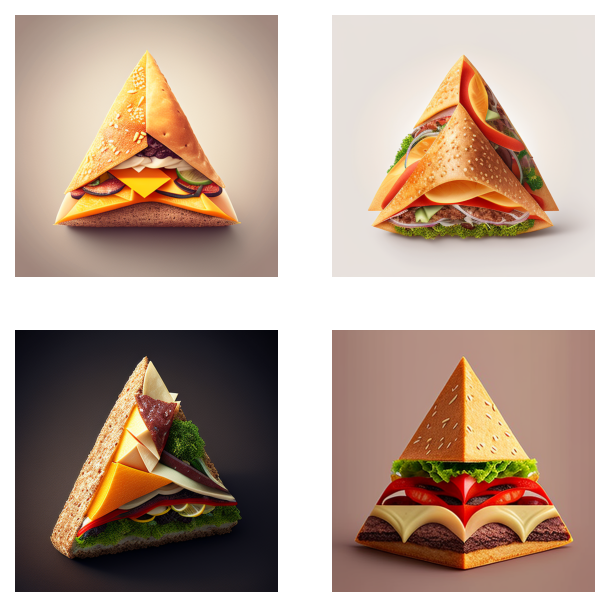

In [137]:
#IMAGENES ORIGINALES
plt.figure(figsize=(5, 5), dpi=150)
plt.subplot(2,2,1)
plt.axis('off')
im_rgb = cv.cvtColor(imag[0], cv.COLOR_BGR2RGB)
plt.imshow(im_rgb)

plt.subplot(2,2,2)
plt.axis('off')
im_rgb = cv.cvtColor(imag[1], cv.COLOR_BGR2RGB)
plt.imshow(im_rgb)

plt.subplot(2,2,3)
plt.axis('off')
im_rgb = cv.cvtColor(imag[2], cv.COLOR_BGR2RGB)
plt.imshow(im_rgb)

plt.subplot(2,2,4)
plt.axis('off')
im_rgb = cv.cvtColor(imag[3], cv.COLOR_BGR2RGB)
plt.imshow(im_rgb)

<h3>Un ejemplo de traza del procedimiento sobre una imagen real</h3>

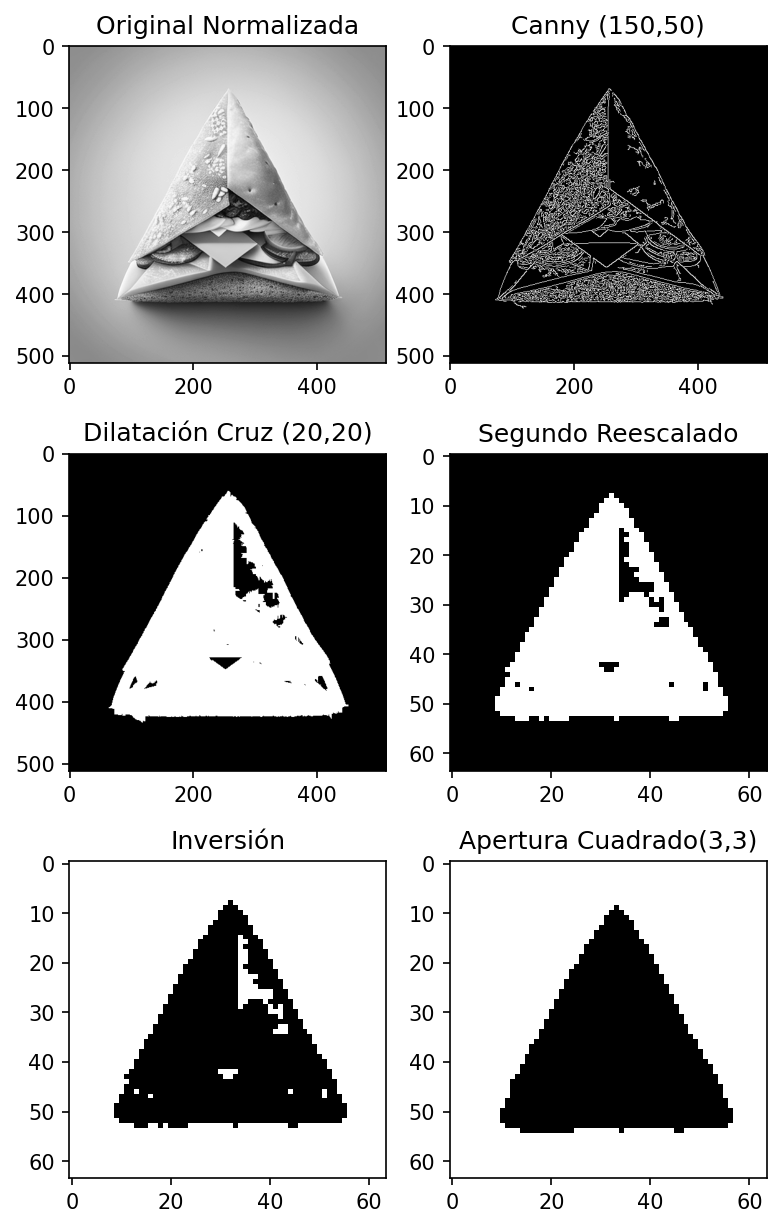

In [127]:
im1 = imgs[0]
refined = refineShape(im1, showResults = True)

<h2>Tests sobre 4 imágenes reales</h2>

In [99]:
transformadas = np.array([refineShape(img) for img in imgs])

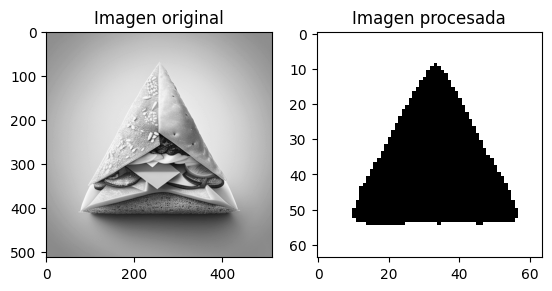

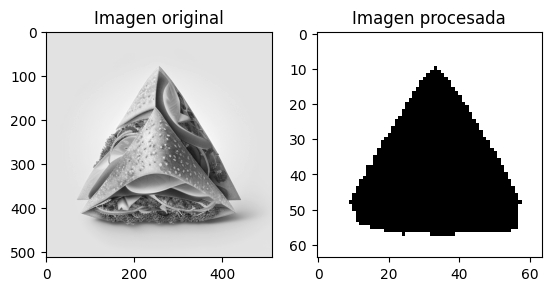

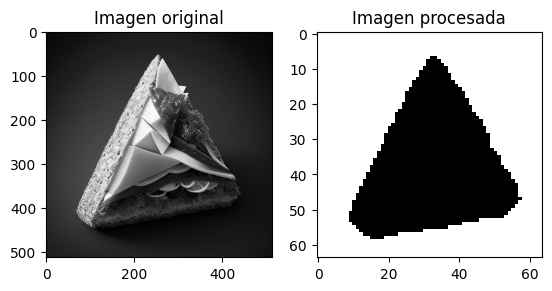

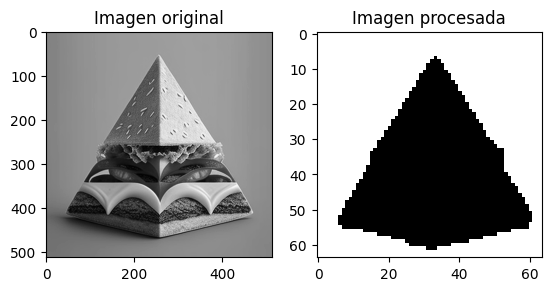

In [100]:
for i in range(len(transformadas)):
    plt.figure(i)
    plt.subplot(1,2,1)
    plt.title("Imagen original")
    plt.imshow(imgs[i], cmap = 'gray')
    plt.subplot(1,2,2)
    plt.title("Imagen procesada")
    plt.imshow(transformadas[i], cmap = 'gray')
    cv.imwrite(str(i)+'.png', transformadas[i])

In [107]:
predict = model.predict(np.array(transformadas))

1/1 [==============================] - 0s 169ms/step


In [109]:
prediccion = np.array([class_names[a.argmax()] for a in predict])

In [110]:
prediccion

array(['triangulos', 'triangulos', 'triangulos', 'triangulos'],
      dtype='<U10')